## Importing the needed libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Loading the training CV data

In [2]:
# Loading the processed IMU data 
IMU_data = pd.read_csv('data/training.csv')

# Previewing the IMU data
IMU_data.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,straight,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,straight,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,rest,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,rest,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,straight,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [3]:
# Separating the features (IMU data)
X = IMU_data[[col for col in IMU_data.columns if col !='motion_state']].copy()
X.head()

,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [4]:
y = IMU_data['motion_state'].copy()
y.head()

0    straight
1    straight
2        rest
3        rest
4    straight
Name: motion_state, dtype: object

In [5]:
# Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Setting up the Pipeline and Parameter Grid Search

In [6]:
# Setting up pipeline to test different scaling techniques with SVM
pipe = Pipeline([('preprocessor', StandardScaler()),
                 ('classifier', [SVC()])])

In [7]:
# Setting up the parameter grid to tune the hyperparameters and get the best results
param_grid = [{'preprocessor': [StandardScaler(), RobustScaler(), MinMaxScaler(), None],
               'classifier': [SVC()],
               'classifier__C': [0.001, 0.01, 0.1, 1, 10],
               'classifier__gamma': ['scale', 0.001, 0.01, 0.1, 1, 10],
               'classifier__kernel': ['rbf', 'linear', 'poly']
              }]

In [8]:
# Performing a grid search across all the set hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('classifier', [SVC()])]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10],
                          'classifier__gamma': ['scale', 0.001, 0.01, 0.1, 1,
                                                10],
                          'classifier__kernel': ['rbf', 'linear', 'poly'],
                          'preprocessor': [StandardScaler(), RobustScaler(),
                                           MinMaxScaler(), None]}],
             return_train_score=True, scoring='accuracy')

## Grid Search Best Results

In [9]:
# Best parameters
print("Best Parameters:")
grid.best_params_

Best Parameters:


{'classifier': SVC(),
 'classifier__C': 1,
 'classifier__gamma': 10,
 'classifier__kernel': 'poly',
 'preprocessor': None}

In [10]:
# Best cross-validation train score
print("Best CV Train Score:")
grid.cv_results_['mean_train_score'][grid.best_index_]

Best CV Train Score:


0.893639846743295

In [11]:
# Best cross-validation test score
print("Best CV Test Score:")
grid.best_score_

Best CV Test Score:


0.8783783783783784

## Performance on Testing Data

In [12]:
# Test set accuracy
best_test_model = grid.best_estimator_
print("Test-set score:")
best_test_model.score(X_test, y_test)

Test-set score:


0.8461538461538461

In [14]:
# Testing on completely new dataset
IMU_data2 = pd.read_csv('data/testing.csv')
X2 = IMU_data2[[col for col in IMU_data.columns if col !='motion_state']].copy()
y2 = IMU_data2['motion_state'].copy()
print("Testing 2 set score:")
best_test_model.score(X2, y2)

Testing 2 set score:


0.92

In [15]:
# Testing on completely new dataset
IMU_data3 = pd.read_csv('data/testing2.csv')
X3 = IMU_data3[[col for col in IMU_data.columns if col !='motion_state']].copy()
y3 = IMU_data3['motion_state'].copy()
print("Testing 3 set score:")
best_test_model.score(X3, y3)

Testing 3 set score:


0.9337539432176656

## Visualizing Accuracy

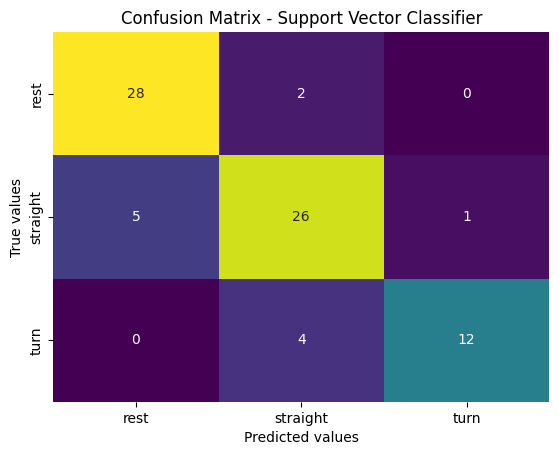


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

        rest       0.85      0.93      0.89        30
    straight       0.81      0.81      0.81        32
        turn       0.92      0.75      0.83        16

    accuracy                           0.85        78
   macro avg       0.86      0.83      0.84        78
weighted avg       0.85      0.85      0.84        78


Accuracy Score: 0.8461538461538461
Precision Score: 0.861353923853924
Recall Score: 0.8319444444444445
F1 Score: 0.8429916985951468


In [23]:
# Function for outputting the confusion matrix
def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')

    '''# Calculate additional metrics
    tn, fp, fn, tp = confusion_mat.ravel()

    # Print additional metrics
    print("Metrics for", model)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)'''

    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)
    
pred_val = grid.predict(X_test)
evaluate_classification(y_test, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier')

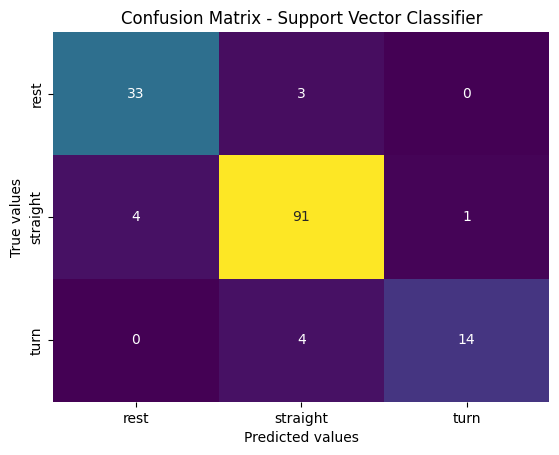


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

        rest       0.89      0.92      0.90        36
    straight       0.93      0.95      0.94        96
        turn       0.93      0.78      0.85        18

    accuracy                           0.92       150
   macro avg       0.92      0.88      0.90       150
weighted avg       0.92      0.92      0.92       150


Accuracy Score: 0.92
Precision Score: 0.9179322179322179
Recall Score: 0.8807870370370371
F1 Score: 0.8969129224742839


In [24]:
pred_val = grid.predict(X2)
evaluate_classification(y2, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier')

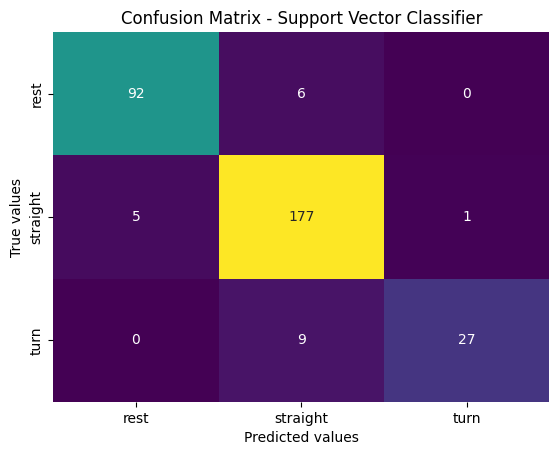


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

        rest       0.95      0.94      0.94        98
    straight       0.92      0.97      0.94       183
        turn       0.96      0.75      0.84        36

    accuracy                           0.93       317
   macro avg       0.94      0.89      0.91       317
weighted avg       0.93      0.93      0.93       317


Accuracy Score: 0.9337539432176656
Precision Score: 0.9448714408443789
Recall Score: 0.8853295416527267
F1 Score: 0.9104465811965813


In [25]:
pred_val = grid.predict(X3)
evaluate_classification(y3, pred_val, ['rest', 'straight', 'turn'], 'Support Vector Classifier')